In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

## Loading Dataset

In [2]:
data = pd.read_csv("CLTVֹֹ_Example.csv",encoding='ISO-8859-1')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2018 08:36,2.55,17850.0,Israel
1,536365,71053,WHITE METAL LANTERN,6,01/12/2018 08:36,3.39,17850.0,Israel
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2018 08:36,2.75,17850.0,Israel
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2018 08:36,3.39,17850.0,Israel
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2018 08:36,3.39,17850.0,Israel


## Removing Duplicates

In [4]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

## Data Insights

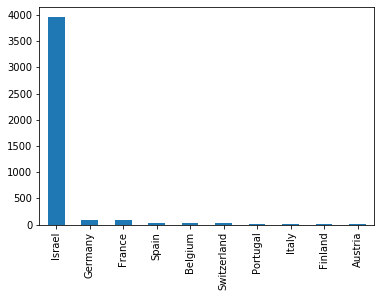

In [5]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [6]:
il_data=data[data.Country=='Israel']

In [7]:
il_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      495478 non-null object
StockCode      495478 non-null object
Description    494024 non-null object
Quantity       495478 non-null int64
InvoiceDate    495478 non-null object
UnitPrice      495478 non-null float64
CustomerID     361878 non-null float64
Country        495478 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 34.0+ MB


In [8]:
il_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
il_data = il_data[(il_data['Quantity']>0)]

In [10]:
il_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      486286 non-null object
StockCode      486286 non-null object
Description    485694 non-null object
Quantity       486286 non-null int64
InvoiceDate    486286 non-null object
UnitPrice      486286 non-null float64
CustomerID     354345 non-null float64
Country        486286 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.4+ MB


## Filter required Columns

In [11]:
il_data=il_data[['CustomerID',
                 'InvoiceDate',
                 'InvoiceNo',
                 'Quantity',
                 'UnitPrice']]

In [12]:
#Calulate total purchase
il_data['TotalPurchase'] = il_data['Quantity'] * il_data['UnitPrice']

In [13]:
il_data['InvoiceDate1']=pd.to_datetime(il_data['InvoiceDate'])
il_data.drop(['InvoiceDate'], axis=1, inplace=True)
il_data.rename(columns={"InvoiceDate1": "InvoiceDate"}, inplace=True)

In [14]:
il_data_group=il_data.groupby('CustomerID').agg(
    {'InvoiceDate': lambda date: (date.max() - date.min()).days,
     'InvoiceNo': lambda num: len(num),
     'Quantity': lambda quant: quant.sum(),
     'TotalPurchase': lambda price: price.sum()})

In [15]:
il_data_group.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,554,103,1275,4196.01
12748.0,692,4596,25748,33719.73
12749.0,312,199,1471,4090.88
12820.0,282,59,722,942.34


## Rename the column

In [16]:
# Change the name of columns
il_data_group.columns=['num_days','num_transactions','num_units','spent_money']
il_data_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,554,103,1275,4196.01
12748.0,692,4596,25748,33719.73
12749.0,312,199,1471,4090.88
12820.0,282,59,722,942.34


# Calculate CLV using following formula:

### 1. Calculate Average Order Value

In [17]:
# Average Order Value
il_data_group['avg_order_value']=il_data_group['spent_money']/il_data_group['num_transactions']

In [18]:
il_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12747.0,554,103,1275,4196.01,40.737961
12748.0,692,4596,25748,33719.73,7.336756
12749.0,312,199,1471,4090.88,20.557186
12820.0,282,59,722,942.34,15.971864


### 2. Calculate Purchase Frequency

In [19]:
# Purchase Frequency
purchase_frequency=sum(il_data_group['num_transactions'])/il_data_group.shape[0]

### 3. Calculate Repeat Rate and Churn Rate

In [20]:
# Repeat Rate
repeat_rate=il_data_group[il_data_group.num_transactions > 1].shape[0]/il_data_group.shape[0]

In [21]:
# Churn Rate
churn_rate=1-repeat_rate

In [22]:
print("The Purchase Frequency is", round(purchase_frequency,2),"orders placed by each customer")
print("The Repeat Rate is", "{:.2%}".format(repeat_rate))
print("The Churn Rate is", "{:.2%}".format(churn_rate))      

The Purchase Frequency is 90.37 orders placed by each customer
The Repeat Rate is 98.19%
The Churn Rate is 1.81%


### 4. Calculate Profit Margin

In [23]:
# Profit Margin
il_data_group['profit_margin']=il_data_group['spent_money']*0.05

In [24]:
il_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800
12747.0,554,103,1275,4196.01,40.737961,209.8005
12748.0,692,4596,25748,33719.73,7.336756,1685.9865
12749.0,312,199,1471,4090.88,20.557186,204.5440
12820.0,282,59,722,942.34,15.971864,47.1170


### 5. Calcualte Customer Lifetime Value

In [25]:
# Customer Value
il_data_group['CLV']=(il_data_group['avg_order_value']*purchase_frequency)/churn_rate

In [26]:
#Customer Lifetime Value
il_data_group['cust_lifetime_value']=il_data_group['CLV']*il_data_group['profit_margin']

In [27]:
il_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12
12747.0,554,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07
12748.0,692,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07
12749.0,312,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07
12820.0,282,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06


# Prediction Model for CLV

In [28]:
il_data.head()

,CustomerID,InvoiceNo,Quantity,UnitPrice,TotalPurchase,InvoiceDate
0,17850.0,536365,6,2.55,15.30,2018-01-12 08:36:00
1,17850.0,536365,6,3.39,20.34,2018-01-12 08:36:00
2,17850.0,536365,8,2.75,22.00,2018-01-12 08:36:00
3,17850.0,536365,6,3.39,20.34,2018-01-12 08:36:00
4,17850.0,536365,6,3.39,20.34,2018-01-12 08:36:00


In [29]:
# Extract month and year from InvoiceDate.
il_data['month_yr'] = il_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))

In [30]:
il_data.head()

,CustomerID,InvoiceNo,Quantity,UnitPrice,TotalPurchase,InvoiceDate,month_yr
0,17850.0,536365,6,2.55,15.30,2018-01-12 08:36:00,Jan-2018
1,17850.0,536365,6,3.39,20.34,2018-01-12 08:36:00,Jan-2018
2,17850.0,536365,8,2.75,22.00,2018-01-12 08:36:00,Jan-2018
3,17850.0,536365,6,3.39,20.34,2018-01-12 08:36:00,Jan-2018
4,17850.0,536365,6,3.39,20.34,2018-01-12 08:36:00,Jan-2018


In [31]:
# Building pivot table
sale=il_data.pivot_table(index=['CustomerID'],
                         columns=['month_yr'],
                         values='TotalPurchase',
                         aggfunc='sum',
                         fill_value=0).reset_index()

In [32]:
sale.head()

month_yr,CustomerID,Apr-2019,Aug-2018,Aug-2019,Dec-2018,Dec-2019,Feb-2018,Feb-2019,Jan-2018,Jan-2019,...,Jun-2019,Mar-2018,Mar-2019,May-2018,May-2019,Nov-2019,Oct-2018,Oct-2019,Sep-2018,Sep-2019
0,12346.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,77183.60,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
1,12747.0,675.38,0.00,301.70,347.71,0.0,0.00,0.00,0.00,613.82,...,376.30,0.0,0.00,358.56,771.31,312.73,0.00,0.00,0.0,0.00
2,12748.0,1351.54,367.52,1926.85,809.80,538.3,4.25,673.06,4.95,666.94,...,2582.56,0.0,1148.78,966.40,1407.43,11339.11,1416.98,2369.79,136.2,4113.07
3,12749.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1896.13,...,763.06,0.0,0.00,0.00,0.00,572.59,0.00,859.10,0.0,0.00
4,12820.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,170.46,...,210.35,0.0,0.00,0.00,0.00,0.00,0.00,343.76,0.0,217.77


In [33]:
# Sum all the months sales
sale['CLV']=sale.iloc[:,2:].sum(axis=1)

In [34]:
sale.head()

month_yr,CustomerID,Apr-2019,Aug-2018,Aug-2019,Dec-2018,Dec-2019,Feb-2018,Feb-2019,Jan-2018,Jan-2019,...,Mar-2018,Mar-2019,May-2018,May-2019,Nov-2019,Oct-2018,Oct-2019,Sep-2018,Sep-2019,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,77183.60,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,77183.60
1,12747.0,675.38,0.00,301.70,347.71,0.0,0.00,0.00,0.00,613.82,...,0.0,0.00,358.56,771.31,312.73,0.00,0.00,0.0,0.00,3520.63
2,12748.0,1351.54,367.52,1926.85,809.80,538.3,4.25,673.06,4.95,666.94,...,0.0,1148.78,966.40,1407.43,11339.11,1416.98,2369.79,136.2,4113.07,32368.19
3,12749.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1896.13,...,0.0,0.00,0.00,0.00,572.59,0.00,859.10,0.0,0.00,4090.88
4,12820.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,170.46,...,0.0,0.00,0.00,0.00,0.00,0.00,343.76,0.0,217.77,942.34


## Selecting Feature

In [35]:
X=sale[['Dec-2019','Nov-2019', 'Oct-2019','Sep-2019','Aug-2019','Jul-2019']]
y=sale[['CLV']]

## Splitting Data

In [36]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Model Development

In [37]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
regressor = LinearRegression()

# fit the model to the training data (learn the coefficients)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
import statsmodels.api as sm

# Add a constant to the independent value
X1_train = sm.add_constant(X_train)

# make regression model 
model = sm.OLS(y_train, X1_train)

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     5091.
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        00:34:20   Log-Likelihood:                -24704.
No. Observations:                2744   AIC:                         4.942e+04
Df Residuals:                    2737   BIC:                         4.946e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.9169     40.044      3.819      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [39]:
# print the intercept and coefficients
coef = pd.DataFrame(result.params.values,columns={'coef'},)
print('Intercept:',round(coef.iloc[0,0],4))
print('--------------------------------')
print('Slopes:')
print('--------------------------------')
print('Dec-2019:',round(coef.iloc[1,0],4))
print('Nov-2019:',round(coef.iloc[2,0],4))
print('Oct-2019:',round(coef.iloc[3,0],4))
print('Sep-2019:',round(coef.iloc[4,0],4))
print('Aug-2019:',round(coef.iloc[5,0],4))
print('Jul-2019:',round(coef.iloc[6,0],4))

Intercept: 152.9169
--------------------------------
Slopes:
--------------------------------
Dec-2019: 1.6573
Nov-2019: 1.2501
Oct-2019: 1.2928
Sep-2019: 1.0262
Aug-2019: 2.0346
Jul-2019: 3.0964


In [40]:
# make predictions on the testing set
y_pred = regressor.predict(X_test)

# How Well Does the Model Fit the data?

In [41]:
from sklearn import metrics
# compute the R Square for model
print("R-Square:","{:.2%}".format(metrics.r2_score(y_test, y_pred)))
print("This model has a higher R-squared","{:.2%}".format(metrics.r2_score(y_test, y_pred)),
      ". This model provides a better fit to the data")

R-Square: 95.62%
This model has a higher R-squared 95.62% . This model provides a better fit to the data


## Model Evaluation

In [42]:
# calculate MAE using scikit-learn
print("The Mean Absolute Error (MAE) is:",round(metrics.mean_absolute_error(y_test,y_pred),2))
#calculate mean squared error
print("The Mean Squared Error (MSE):",round(metrics.mean_squared_error(y_test, y_pred),2))
# compute the RMSE of our predictions
print("The Root Mean Squared Error (RMSE) is:",round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

The Mean Absolute Error (MAE) is: 622.36
The Mean Squared Error (MSE): 2299523.74
The Root Mean Squared Error (RMSE) is: 1516.42


# Real-time Prediction

In [43]:
new_data = np.array([100,75,50,0,0,0]).reshape(1, -1)

new_pred=regressor.predict(new_data)

result = float(new_pred[0])
print("\033[1m The CLV for the new customer is: $",round(result,2))

 The CLV for the new customer is: $ 477.05
